# Simple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Regression/Salary_Data.csv

Mounted at /content/drive


## Importing the dataset

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data preprocessing

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

Why don't we apply Feature Scaling in this dataset?

Because we only have one independent variable. When there are 2 or more variables, you'll need feature scaling, because there are relationship between them.

## Training the Simple Linear Regression model on the Training set
We'll use the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

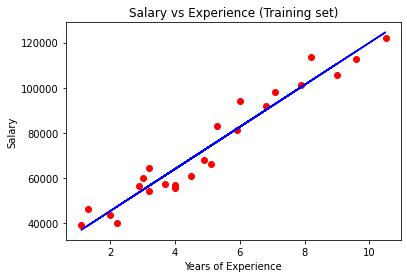

In [ ]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## Visualising the Test set results

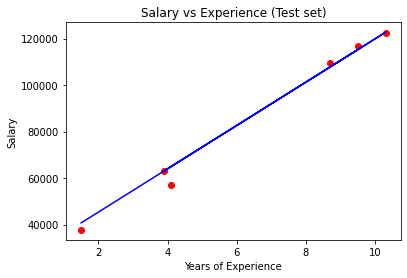

In [ ]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, regressor.predict(X_test), color="blue")
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## Making a single prediction 

In [ ]:
regressor.predict([[12]])

array([138531.00067138])

Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138967,5.

Important note: Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

12→scalar 

[12]→1D array 

[[12]]→2D array

## Getting the final linear regression equation with the values of coefficients

In [ ]:
regressor.coef_, regressor.intercept_

(array([9312.57512673]), 26780.09915062818)

Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary}=9312.57 \times \textrm{YearsExperience} + 26780.09$$ 

Important Note: To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.